In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

## Demand

$$p(x) = a - b(x_{1}+x_{2})\quad a,b > 0$$

In [2]:
def demand(x1,x2,a,b):
    return a - b*(x1 + x2)

## Cost

$$c(x) = \begin{cases}0 & x = 0 \\ cx & \text{else}\end{cases}$$

In [3]:
# Cost function
def cost(x,c):
    if x == 0:
     cost = 0
    else:
     cost = c*x
    return cost

## Profit

In [4]:
def profit(x1,x2,c1,a,b):
    return demand(x1,x2,a,b)*x1-cost(x1,c1)

In [5]:
def reaction(x2,c1,a,b):
    x1 = optimize.brute(lambda x: -profit(x,x2,c1,a,b),((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

In [6]:
def vector_reaction(x,param): # vector param = (a,b,c1,c2)
    return array(x) - array([reaction(x[1],param[2],param[0],param[1]),
                             reaction(x[0],param[3],param[0],param[1])])

In [7]:
param = [140,1,20,20]
x0 = [20, 20]

ans = optimize.fsolve(vector_reaction, x0, args = (param))
print(ans)

[40. 40.]


In [8]:
demand = lambda x1, x2 : 140 - (x1 + x2)
cost1 = lambda x : 20*x

In [9]:
def profit2(x1,x2):
    return demand(x1,x2)*x1 - cost1(x1)

def reaction2(x2):
    x1 = optimize.brute(lambda x: -profit2(x,x2),((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

def vector_reaction2(x): 
    return array(x) - array([reaction2(x[1]),reaction2(x[0])])
    

In [10]:
x02 = [0, 0]
ans2 = optimize.fsolve(vector_reaction2, x02)
print(ans2)

[40. 40.]


In [11]:

profit1 = lambda x1, x2 : demand(x1,x2)*x1 - cost1(x1)

profit2 = lambda x1, x2 : demand(x1,x2)*x2 - cost1(x2)

def reaction1(x2):
    x1 = lambda x2 : optimize.brute(lambda x: -profit1(x,x2),((0,1,),))                                          
    return x1[0]

def reaction2(x1):
    x2 = optimize.brute(lambda x: -profit2(x1,x),((0,1,),))                                                   
    return x2[0]

In [12]:
import numpy as np
x2 = np.linspace(0,120)
xx = np.array([reaction1(x) for x in x2])
xx

array([60.        , 58.77548828, 57.55097656, 56.3265625 , 55.10205078,
       53.87753906, 52.65302734, 51.42861328, 50.20410156, 48.97958984,
       47.75507813, 46.53056641, 45.30615234, 44.08164063, 42.85712891,
       41.63261719, 40.40820313, 39.18369141, 37.95917969, 36.73466797,
       35.51015625, 34.28574219, 33.06123047, 31.83671875, 30.61220703,
       29.38779297, 28.16328125, 26.93876953, 25.71425781, 24.48984375,
       23.26533203, 22.04082031, 20.81630859, 19.59179688, 18.36738281,
       17.14287109, 15.91835938, 14.69384766, 13.46943359, 12.24492188,
       11.02041016,  9.79589844,  8.57138672,  7.34697266,  6.12246094,
        4.89794922,  3.6734375 ,  2.44902344,  1.22451172,  0.        ])

In [13]:
x1 = np.linspace(0,120)
yy = np.array([reaction2(x) for x in x1])
yy

array([60.        , 58.77548828, 57.55097656, 56.3265625 , 55.10205078,
       53.87753906, 52.65302734, 51.42861328, 50.20410156, 48.97958984,
       47.75507813, 46.53056641, 45.30615234, 44.08164063, 42.85712891,
       41.63261719, 40.40820313, 39.18369141, 37.95917969, 36.73466797,
       35.51015625, 34.28574219, 33.06123047, 31.83671875, 30.61220703,
       29.38779297, 28.16328125, 26.93876953, 25.71425781, 24.48984375,
       23.26533203, 22.04082031, 20.81630859, 19.59179688, 18.36738281,
       17.14287109, 15.91835938, 14.69384766, 13.46943359, 12.24492188,
       11.02041016,  9.79589844,  8.57138672,  7.34697266,  6.12246094,
        4.89794922,  3.6734375 ,  2.44902344,  1.22451172,  0.        ])

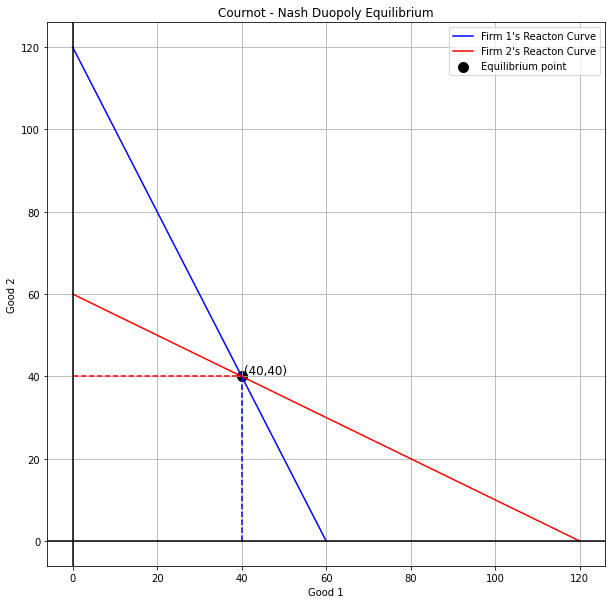

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xx,x2,color="blue",label="Firm 1's Reacton Curve")
ax.plot(x1,yy,color="red",label="Firm 2's Reacton Curve")
ax.grid(visible=True)
ax.plot([0,40],[40,40],linestyle="--",color="red")
ax.plot([40,40],[0,40],linestyle="--",color="blue")
ax.scatter(x=40,y=40,color="black",s=100,marker="o",label="Equilibrium point")
ax.text(x=40.5,y=40.5,s="(40,40)",fontsize=12,color="black")
ax.axvline(x=0,color="black")
ax.axhline(y=0,color="black")
ax.set(xlabel="Good 1", ylabel="Good 2",title="Cournot - Nash Duopoly Equilibrium")
ax.legend()
plt.show()

In [15]:
def prime(f,dt=10e-3):
    return lambda x: (f(x+dt)-f(x-dt))/(2*dt)

"""
Marginal rate of substitution of a profit function pi(.)
"""
def MRS(pi):
    pi_x=lambda x1,x2: prime(lambda x1: pi(x1,x2))(x1)
    pi_y=lambda x1,x2: prime(lambda x2: pi(x1,x2))(x2)
    return pi_x,pi_y
